| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./01_Estadisticas_descriptivas_para_explorar_datos.ipynb)| [⏩](./03_Probabilidad.ipynb)|

# **02 Producción de datos, muestreo**

En este módulo, estudiará los conceptos principales para el muestreo y el diseño de experimentos. Aprenderá cuáles son los escollos más curiosos y cómo evaluar la eficacia de dichos experimentos.

## **2.1 Introducción**

La **producción de datos** y el **muestreo** son dos conceptos fundamentales en estadística y ciencia de datos que nos ayudan a entender y analizar conjuntos de datos grandes y complejos.

**Producción de Datos**

La producción de datos implica recopilar, medir y organizar datos para su análisis. Los datos pueden ser producidos a través de experimentos, encuestas, observaciones, y otras metodologías de recopilación de datos. La clave para una buena producción de datos es asegurar que los datos sean relevantes, precisos y representativos de la población o fenómeno que se está estudiando.

**Muestreo**

El **muestreo** es el proceso de selección de un subconjunto de individuos de una población para estimar características de toda la población. Es una herramienta esencial en estadística debido a que permite obtener conclusiones sobre una población entera sin necesidad de examinar cada miembro de la población.

Existen varios **métodos de muestreo**, incluyendo:

- **Muestreo aleatorio simple**: Cada miembro de la población tiene la misma probabilidad de ser seleccionado.
- **Muestreo estratificado**: La población se divide en estratos y se realiza un muestreo aleatorio dentro de cada estrato.
- **Muestreo por conglomerados**: La población se divide en grupos (conglomerados), y se seleccionan algunos conglomerados al azar para ser incluidos en la muestra.

**Fórmula para el tamaño de muestra** para una población infinita bajo muestreo aleatorio simple:

$n = \frac{Z^2 \times p \times (1-p)}{E^2}$

donde:

- $(n)$ es el tamaño de la muestra,
- $(Z)$ es el valor Z correspondiente al nivel de confianza deseado (por ejemplo, 1.96 para el 95% de confianza),
- $(p)$ es la proporción estimada del evento de interés,
- $(E)$ es el margen de error tolerable.

Vamos a crear un conjunto de datos para ilustrar el concepto de muestreo. Supongamos que tenemos una población de calificaciones de estudiantes y queremos seleccionar una muestra para analizar.

In [1]:
import numpy as np
import pandas as pd

# Generación de un conjunto de datos de ejemplo: calificaciones de 1000 estudiantes
np.random.seed(42)  # Para reproducibilidad
calificaciones = np.random.randint(50, 101, size=1000)  # Calificaciones entre 50 y 100

# Creando un DataFrame para las calificaciones
df_calificaciones = pd.DataFrame(calificaciones, columns=['Calificaciones'])

# Visualizando las primeras 10 calificaciones
df_calificaciones.head(10)

,Calificaciones
0,88
1,78
2,64
3,92
4,57
5,70
6,88
7,68
8,72
9,60


Hemos creado un conjunto de datos que representa las calificaciones de 1000 estudiantes, con valores que varían entre 50 y 100. Ahora, vamos a realizar un **muestreo aleatorio simple** para seleccionar un subconjunto de estas calificaciones y calcular la media de la muestra. También visualizaremos la distribución de las calificaciones de la población completa y la muestra seleccionada.

In [2]:
# Realizando un muestreo aleatorio simple de 100 calificaciones
muestra_calificaciones = df_calificaciones.sample(n=100, random_state=42)

# Calculando la media de la población y de la muestra
media_poblacion = df_calificaciones['Calificaciones'].mean()
media_muestra = muestra_calificaciones['Calificaciones'].mean()

media_poblacion, media_muestra

(75.232, 73.48)

La media de las calificaciones para toda la población es aproximadamente 75.23, mientras que la media de nuestra muestra de 100 calificaciones es aproximadamente 73.48. Estos resultados nos muestran cómo el muestreo puede proporcionarnos una estimación cercana de las características de la población entera sin necesidad de examinar cada miembro.

Ahora, visualizaremos la distribución de las calificaciones de la población completa y la muestra seleccionada para ver cómo la muestra representa a la población.

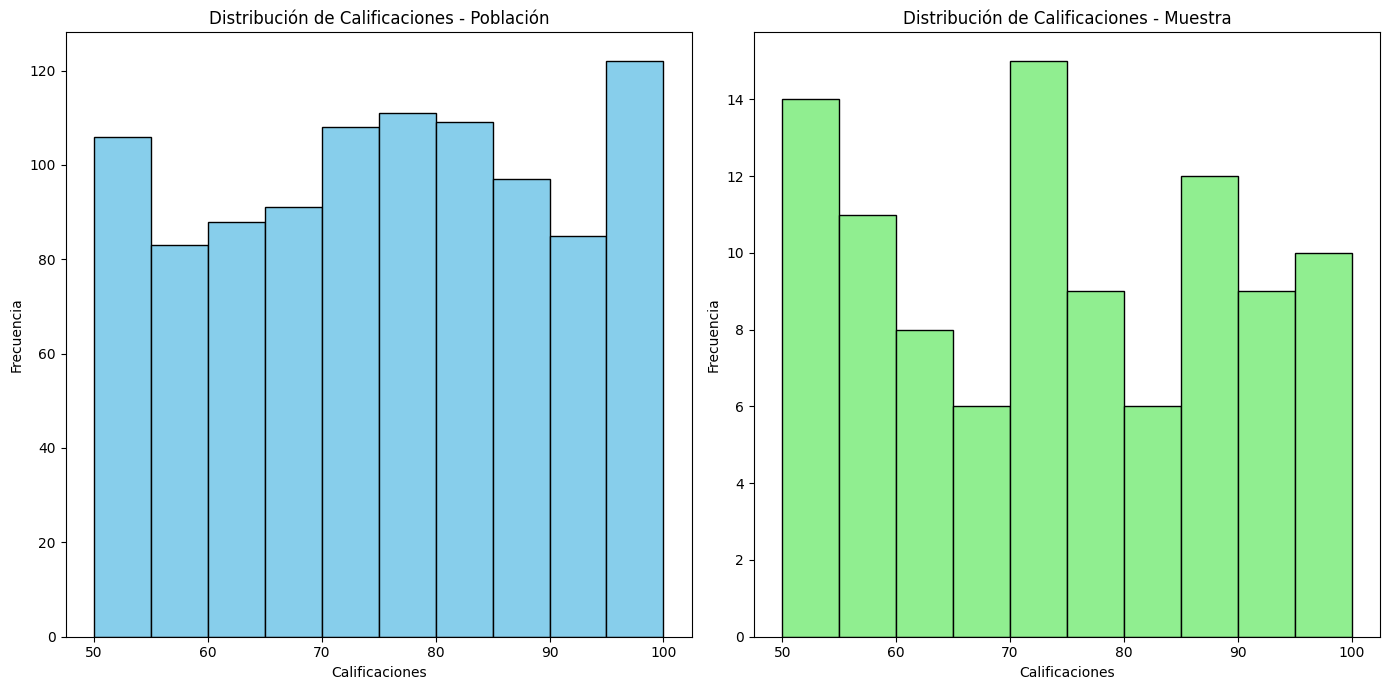

In [3]:
import matplotlib.pyplot as plt

# Visualización de la distribución de calificaciones para la población y la muestra
plt.figure(figsize=(14, 7))

# Histograma para la población
plt.subplot(1, 2, 1)
plt.hist(df_calificaciones['Calificaciones'], bins=range(50, 101, 5), color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones - Población')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')

# Histograma para la muestra
plt.subplot(1, 2, 2)
plt.hist(muestra_calificaciones['Calificaciones'], bins=range(50, 101, 5), color='lightgreen', edgecolor='black')
plt.title('Distribución de Calificaciones - Muestra')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Las visualizaciones muestran las distribuciones de calificaciones para tanto la población completa como la muestra seleccionada. Aunque hay algunas variaciones debido al tamaño y selección aleatoria de la muestra, la muestra proporciona una representación razonable de la población, permitiéndonos hacer inferencias sobre la población entera basadas en la información de la muestra.

Este ejemplo ilustra la importancia y eficacia del muestreo en estadística, especialmente cuando es impracticable o imposible examinar cada miembro de una población grande. El muestreo permite a los investigadores y analistas obtener estimaciones precisas sobre características poblacionales importantes, como la media, con un esfuerzo y costo considerablemente menores.

## **2.2 Muestreo aleatorio simple y muestreo aleatorio estratificado**

El **muestreo aleatorio simple** y el **muestreo aleatorio estratificado** son dos técnicas fundamentales en estadística para seleccionar muestras de una población más grande. Ambas técnicas tienen como objetivo estimar características de la población y facilitar el análisis de datos sin necesidad de examinar cada miembro de la población. Sin embargo, difieren en cómo se seleccionan las muestras.

**Muestreo Aleatorio Simple (MAS)**

El **muestreo aleatorio simple** es el proceso de seleccionar una muestra de manera que cada miembro de la población tenga la misma probabilidad de ser incluido. No hay distinción entre los miembros de la población; cada selección es completamente aleatoria.

**Fórmula para el tamaño de muestra en MAS**:

Para determinar el tamaño de muestra necesario para obtener una estimación con un determinado nivel de confianza y margen de error, se utiliza la fórmula:

$n = \frac{Z^2 \cdot p \cdot (1-p)}{E^2}$

donde:

- $(n)$ es el tamaño de la muestra,
- $(Z)$ es el valor Z correspondiente al nivel de confianza deseado (por ejemplo, 1.96 para 95%),
- $(p)$ es la proporción estimada del atributo de interés en la población,
- $(E)$ es el margen de error deseado.

**Muestreo Aleatorio Estratificado (MAE)**

El **muestreo aleatorio estratificado** implica dividir la población en subgrupos (estratos) basados en una característica específica, y luego realizar un muestreo aleatorio simple dentro de cada estrato. Esta técnica asegura que la muestra sea representativa de la población en términos de la característica utilizada para formar los estratos.

**Fórmula para el tamaño de muestra en cada estrato**:

$n_i = \frac{N_i}{N} \cdot n$

donde:

- $(n_i)$ es el tamaño de la muestra para el estrato $(i)$,
- $(N_i)$ es el tamaño del estrato $(i)$,
- $(N)$ es el tamaño total de la población,
- $(n)$ es el tamaño total de la muestra calculado para lograr el nivel de confianza y margen de error deseados en la población completa.

Para ilustrar estas técnicas, crearemos un DataFrame con datos de ejemplo que representan una población de la cual seleccionaremos muestras usando ambos métodos de muestreo. Además, visualizaremos los resultados para demostrar las diferencias entre estas dos técnicas.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creando datos de ejemplo para ilustrar muestreo aleatorio simple y estratificado
np.random.seed(42)
data = {
    'ID': range(1, 101),
    'Edad': np.random.randint(18, 65, size=100),
    'Estrato': np.random.choice(['Bajo', 'Medio', 'Alto'], size=100, p=[0.3, 0.4, 0.3])
}

df = pd.DataFrame(data)

# Muestra de los primeros datos del DataFrame
df.head()

,ID,Edad,Estrato
0,1,56,Bajo
1,2,46,Bajo
2,3,32,Bajo
3,4,60,Alto
4,5,25,Alto


Hemos creado un DataFrame que representa una población de 100 individuos, cada uno con un identificador único (ID), una edad y un estrato socioeconómico (Bajo, Medio, Alto). Ahora, vamos a proceder con los dos tipos de muestreo:

1. **Muestreo Aleatorio Simple (MAS)**: Seleccionaremos una muestra aleatoria de 20 individuos sin tener en cuenta su estrato.

2. **Muestreo Aleatorio Estratificado (MAE)**: Dividiremos la población en sus respectivos estratos y seleccionaremos una muestra aleatoria de cada estrato, asegurando que cada estrato esté proporcionalmente representado.

Después de realizar el muestreo, visualizaremos las distribuciones de edad de las muestras obtenidas mediante ambos métodos para comparar su representatividad respecto a la población total.

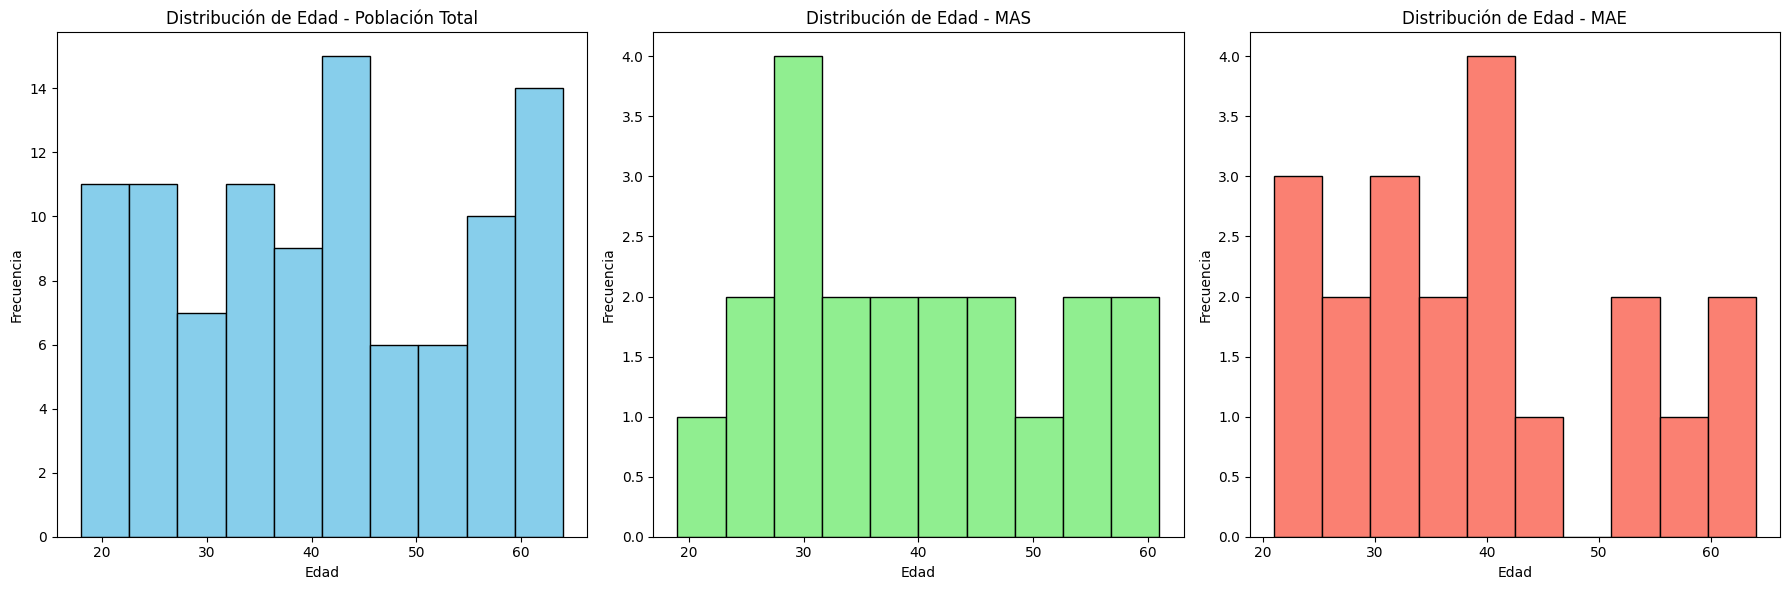

In [5]:
# Muestreo Aleatorio Simple (MAS)
mas = df.sample(n=20, random_state=42)

# Muestreo Aleatorio Estratificado (MAE)
mae = df.groupby('Estrato', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))

# Visualización de las distribuciones de edad para la población total, MAS y MAE
plt.figure(figsize=(18, 6))

# Distribución de la población total
plt.subplot(1, 3, 1)
plt.hist(df['Edad'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad - Población Total')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Distribución del Muestreo Aleatorio Simple
plt.subplot(1, 3, 2)
plt.hist(mas['Edad'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribución de Edad - MAS')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Distribución del Muestreo Aleatorio Estratificado
plt.subplot(1, 3, 3)
plt.hist(mae['Edad'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribución de Edad - MAE')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Las visualizaciones muestran las distribuciones de edad para la población total, la muestra obtenida mediante muestreo aleatorio simple (MAS) y la muestra obtenida mediante muestreo aleatorio estratificado (MAE). A través de estas comparaciones, podemos observar cómo cada método de muestreo refleja la distribución de la población original:

- La **distribución de la población total** nos da una visión general de cómo se distribuyen las edades en toda la población.
- La muestra del **Muestreo Aleatorio Simple (MAS)** refleja esta distribución; sin embargo, debido a la aleatoriedad, puede haber variaciones en la representación de ciertos segmentos de la población.
- La muestra del **Muestreo Aleatorio Estratificado (MAE)** tiene como objetivo mantener la proporcionalidad de los estratos dentro de la muestra. Aunque este ejemplo se enfoca en la edad, el muestreo estratificado asegura que todos los estratos (en este caso, los niveles socioeconómicos) estén adecuadamente representados.

El muestreo aleatorio estratificado es particularmente útil cuando es importante garantizar que todos los subgrupos de la población estén representados en la muestra, lo que puede ser crucial para investigaciones que analizan diferencias o efectos específicos dentro de subgrupos.

## **2.3 Sesgo y error de azar**

El **sesgo** y el **error de azar** son conceptos fundamentales en estadística y ciencia de datos que afectan la validez y precisión de los estudios e investigaciones.

**Sesgo** se refiere a una desviación sistemática de los resultados o estimaciones del verdadero valor de la población. Se produce por errores en la recopilación de datos, la selección de la muestra, o métodos de análisis que no son adecuados, resultando en conclusiones que no son representativas de la población general.

**Error de azar** se debe a la variabilidad natural en los datos o en las muestras seleccionadas de una población. A diferencia del sesgo, el error de azar no es sistemático sino aleatorio, y se puede reducir aumentando el tamaño de la muestra.

**Fórmulas Matemáticas**

No hay una "fórmula" específica para calcular el sesgo o el error de azar, pero sí hay métodos para estimar la magnitud de estos y técnicas para minimizar su impacto.

Para el **sesgo**, se puede calcular la diferencia entre el estimador (por ejemplo, la media de la muestra) y el verdadero valor de la población (la media poblacional). Sin embargo, en la práctica, el verdadero valor de la población rara vez es conocido.

$\text{Sesgo} = \bar{x} - \mu$

donde:

- $( \bar{x} )$ es la media de la muestra,
- $( \mu )$ es la media poblacional.

El **error estándar** es una medida que se utiliza para estimar el error de azar, especialmente para la media:

$SE = \frac{s}{\sqrt{n}}$

donde:

- $( s )$ es la desviación estándar de la muestra,
- $( n )$ es el tamaño de la muestra.

**Ejemplo Práctico**

Vamos a crear un DataFrame con datos de ejemplo para ilustrar estos conceptos. Supondremos que tenemos datos de una muestra sobre una medida específica y queremos calcular el sesgo y el error de azar. Para ilustrar el sesgo, compararemos las estimaciones de dos muestras diferentes extraídas de la misma población pero seleccionadas con diferentes métodos. Para el error de azar, calcularemos el error estándar de la media.

In [6]:
# Creando datos de ejemplo para ilustrar sesgo y error de azar
np.random.seed(42)  # Para resultados reproducibles
# Supongamos que estos datos representan la medida de interés de una población
datos_poblacion = np.random.normal(loc=100, scale=20, size=10000)  # Población con media 100 y desv. estándar 20

# Extrayendo dos muestras de la población
muestra_a = np.random.choice(datos_poblacion, size=100, replace=False)
muestra_b = np.random.choice(datos_poblacion[datos_poblacion > 110], size=100, replace=False)  # Sesgada intencionalmente

# Calculando la media de las muestras y la población
media_poblacion = np.mean(datos_poblacion)
media_muestra_a = np.mean(muestra_a)
media_muestra_b = np.mean(muestra_b)

# Calculando el sesgo de las muestras
sesgo_muestra_a = media_muestra_a - media_poblacion
sesgo_muestra_b = media_muestra_b - media_poblacion

# Calculando el error estándar de la muestra A (menos sesgada)
error_estandar_muestra_a = np.std(muestra_a) / np.sqrt(len(muestra_a))

media_poblacion, media_muestra_a, sesgo_muestra_a, media_muestra_b, sesgo_muestra_b, error_estandar_muestra_a

(99.95728033263148,
 102.33575830699374,
 2.378477974362255,
 122.83829411339643,
 22.881013780764945,
 2.1304959061308457)

En nuestro ejemplo práctico:

- La **media poblacional** es aproximadamente 99.96, lo que representa el verdadero valor de la medida de interés en la población.

- La **media de la muestra A** es aproximadamente 102.34. El **sesgo de la muestra A** es de aproximadamente 2.38, lo que indica una ligera desviación del verdadero valor poblacional debido a variaciones aleatorias en la selección de la muestra.

- La **media de la muestra B** es aproximadamente 122.84. El **sesgo de la muestra B** es de aproximadamente 22.88, lo que indica una desviación significativa del verdadero valor poblacional, debido a una selección sesgada (en este caso, solo se incluyeron valores mayores a 110).

- El **error estándar de la muestra A** es aproximadamente 2.13, lo que proporciona una medida de cuánto se espera que varíe la media de la muestra debido al azar si repitiéramos el proceso de muestreo.

Estos resultados ilustran cómo el sesgo y el error de azar afectan las estimaciones de las características de la población. La muestra B, al estar sesgada, no proporciona una estimación fiable de la media poblacional. Por otro lado, aunque la muestra A tiene un sesgo menor, aún hay un error de azar representado por el error estándar, reflejando la variabilidad inherente al proceso de muestreo.

Para visualizar la diferencia entre las distribuciones de la población y las muestras, y cómo la muestra B está sesgada, generaremos un histograma.

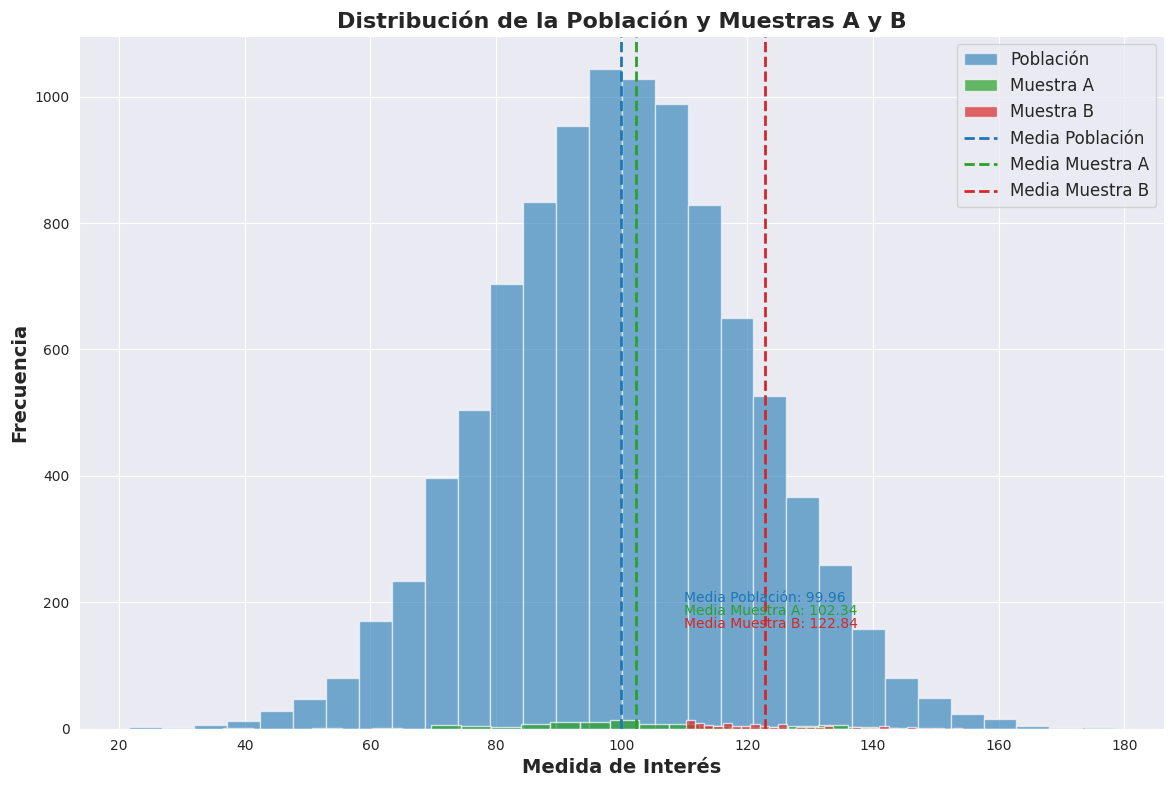

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando el estilo del gráfico (opcional)
sns.set_style("darkgrid")  # Estilo de seaborn con cuadrícula oscura

plt.figure(figsize=(14, 9))

# Histograma de la población con ajustes
plt.hist(datos_poblacion, bins=30, color='#1f77b4', alpha=0.6, label='Población')

# Histograma de la muestra A con ajustes
plt.hist(muestra_a, bins=30, color='#2ca02c', alpha=0.7, label='Muestra A')

# Histograma de la muestra B con ajustes
plt.hist(muestra_b, bins=30, color='#d62728', alpha=0.7, label='Muestra B')

# Líneas verticales para las medias con ajustes
plt.axvline(media_poblacion, color='#1f77b4', linestyle='dashed', linewidth=2, label='Media Población')
plt.axvline(media_muestra_a, color='#2ca02c', linestyle='dashed', linewidth=2, label='Media Muestra A')
plt.axvline(media_muestra_b, color='#d62728', linestyle='dashed', linewidth=2, label='Media Muestra B')

# Ajustando las etiquetas y título
plt.xlabel('Medida de Interés', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')
plt.title('Distribución de la Población y Muestras A y B', fontsize=16, fontweight='bold')

# Ajustando la leyenda
plt.legend(fontsize=12)

# Añadiendo texto adicional al gráfico, como la media de cada muestra
plt.text(110, 200, f'Media Población: {media_poblacion:.2f}', color='#1f77b4')
plt.text(110, 180, f'Media Muestra A: {media_muestra_a:.2f}', color='#2ca02c')
plt.text(110, 160, f'Media Muestra B: {media_muestra_b:.2f}', color='#d62728')

plt.show()

En el histograma generado, puedes ver visualmente la distribución de la población y cómo las muestras A y B se comparan con esta. La muestra A, aunque ligeramente sesgada, sigue estando más cerca de la distribución de la población, mientras que la muestra B, debido al sesgo intencional en su selección, muestra una desviación significativa.

Este gráfico ilustra claramente el impacto del sesgo y el error de azar en la representación de la población a través de muestras, destacando la importancia de una metodología de muestreo adecuada para obtener estimaciones precisas y representativas.

## **2.4 Observación frente a experimento, factores de confusión y el efecto placebo**

**Observación frente a Experimento**

**Observación** y **experimento** son dos enfoques fundamentales en la investigación para recopilar datos y extraer conclusiones sobre hipótesis o fenómenos.

- **Observación**: Implica recopilar datos sin intervenir o modificar el entorno o los sujetos de estudio. Este enfoque es útil cuando las intervenciones son impracticables o no éticas. La observación permite recoger datos en un contexto natural, pero puede ser más susceptible a factores de confusión.

- **Experimento**: Implica manipular una o más variables independientes para observar el efecto sobre una variable dependiente, mientras se controlan otras variables. Este enfoque permite establecer relaciones causales, pero puede ser difícil de realizar en condiciones naturales.

**Factores de Confusión**

Los **factores de confusión** son variables que pueden afectar tanto a la variable independiente como a la variable dependiente, creando una asociación espuria o enmascarando la verdadera asociación entre las variables de interés.

**Efecto Placebo**

El **efecto placebo** se refiere a los cambios percibidos en el bienestar o la salud de un participante que no se atribuyen a ningún tratamiento activo sino a sus expectativas o creencias respecto al tratamiento. En los experimentos, se utiliza un grupo placebo (recibe un tratamiento inactivo) para controlar este efecto.

**Ejemplo Práctico**

Para ilustrar estos conceptos, imaginemos un estudio sobre el efecto de una nueva bebida energética en el rendimiento físico. Crearemos un DataFrame que simule los resultados de un experimento, con un grupo que recibe la bebida energética y otro grupo que recibe un placebo.

No hay fórmulas matemáticas específicas para "observación vs. experimento", "factores de confusión", o el "efecto placebo", pero podemos analizar los datos para identificar posibles efectos y controlar factores de confusión mediante técnicas estadísticas.

Generaremos datos simulados y luego analizaremos la diferencia entre los grupos para investigar la presencia de un efecto de la bebida energética.

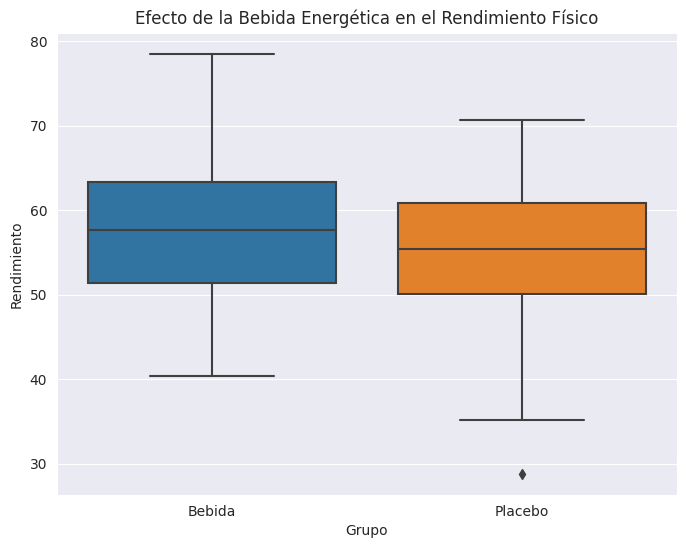

In [8]:
# Generación de datos simulados para el estudio
np.random.seed(42)  # Para reproducibilidad
n = 50  # Número de participantes en cada grupo

# Creando datos para el grupo que recibe la bebida energética
rendimiento_bebida = np.random.normal(loc=60, scale=10, size=n)

# Creando datos para el grupo placebo
rendimiento_placebo = np.random.normal(loc=55, scale=10, size=n)

# Creando el DataFrame
df_estudio = pd.DataFrame({
    'Rendimiento': np.concatenate([rendimiento_bebida, rendimiento_placebo]),
    'Grupo': ['Bebida'] * n + ['Placebo'] * n
})

# Visualización de los datos mediante un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='Grupo', y='Rendimiento', data=df_estudio)
plt.title('Efecto de la Bebida Energética en el Rendimiento Físico')
plt.show()

El diagrama de caja muestra la distribución del rendimiento físico para los grupos que recibieron la bebida energética y el placebo. Puedes observar diferencias en la mediana y la dispersión del rendimiento entre los dos grupos, lo que sugiere que la bebida energética podría tener un efecto en el rendimiento físico.

Este análisis simple demuestra cómo un experimento controlado puede ayudar a identificar posibles efectos de una intervención (en este caso, la bebida energética) mientras se controla el efecto placebo. Sin embargo, para hacer afirmaciones causales sólidas, sería necesario controlar también otros factores de confusión potenciales y realizar análisis estadísticos más rigurosos.

## **2.5 La lógica de los experimentos controlados aleatorios**

Los **experimentos controlados aleatorios (ECA)** son considerados el estándar de oro para determinar las relaciones causales entre variables. En estos experimentos, los participantes son asignados aleatoriamente a dos o más grupos: al menos un grupo experimental, que recibe la intervención o tratamiento de interés, y un grupo de control, que no recibe la intervención, recibe un placebo o sigue el procedimiento estándar. Esta aleatorización ayuda a minimizar los sesgos y asegurar que los grupos sean comparables en cuanto a factores conocidos y desconocidos al inicio del estudio, permitiendo atribuir cualquier diferencia en los resultados finales al efecto de la intervención.

**Lógica de los ECA**

1. **Aleatorización**: Asignar aleatoriamente participantes a los grupos experimental y de control para igualar los grupos en términos de factores de confusión potenciales.

2. **Intervención**: Aplicar la intervención al grupo experimental mientras se mantiene el grupo de control sin cambios o se le aplica un placebo.

3. **Comparación**: Comparar los resultados entre el grupo experimental y el grupo de control para determinar el efecto de la intervención.

**Fórmulas Matemáticas y Análisis**

No hay fórmulas específicas para la realización de un ECA, pero la comparación estadística de los resultados entre grupos puede implicar:

- **Diferencia de medias**:

 $( \mu_{\text{experimental}} - \mu_{\text{control}} )$

- **Análisis de varianza (ANOVA)**: Para comparar las medias entre varios grupos.
- **Prueba t de Student**: Para comparar las medias entre dos grupos, cuando se asume que los datos siguen una distribución normal.

**Ejemplo Práctico**

Supongamos un ECA para evaluar el efecto de un nuevo suplemento dietético en la reducción del peso corporal. Crearemos un DataFrame con datos simulados para un grupo experimental que recibe el suplemento y un grupo de control que recibe un placebo.

Luego, realizaremos un análisis estadístico para comparar la pérdida de peso entre los dos grupos.

In [9]:
# Generando datos simulados para el ECA
np.random.seed(42)  # Para reproducibilidad
n_participantes = 100  # Número de participantes

# Simulando pérdida de peso en kg para ambos grupos después de 12 semanas
# Grupo experimental: supone una pérdida de peso promedio de 5 kg con una desviación estándar de 2 kg
peso_perdido_exp = np.random.normal(loc=5, scale=2, size=n_participantes)

# Grupo de control: supone una pérdida de peso promedio de 3 kg con una desviación estándar de 2 kg
peso_perdido_ctrl = np.random.normal(loc=3, scale=2, size=n_participantes)

# Creando el DataFrame
df_eca = pd.DataFrame({
    'Peso Perdido': np.concatenate([peso_perdido_exp, peso_perdido_ctrl]),
    'Grupo': ['Experimental'] * n_participantes + ['Control'] * n_participantes
})

# Cálculo de la media de pérdida de peso para cada grupo
media_exp = np.mean(peso_perdido_exp)
media_ctrl = np.mean(peso_perdido_ctrl)

# Comparación estadística: Usando la prueba t de Student para comparar las medias
from scipy import stats
t_stat, p_val = stats.ttest_ind(peso_perdido_exp, peso_perdido_ctrl)

media_exp, media_ctrl, t_stat, p_val

(4.792306965211812,
 3.044609174099848,
 6.635596055725041,
 3.0230309820263536e-10)

En nuestro experimento simulado, las medias de pérdida de peso para los grupos experimental y de control son aproximadamente 4.79 kg y 3.04 kg, respectivamente. La prueba t de Student para comparar las medias entre estos dos grupos nos da un estadístico t de aproximadamente 6.64 y un valor p muy pequeño $(p = 3.02 \times 10^{-10})$, lo que indica una diferencia estadísticamente significativa entre los grupos.

Esto sugiere que el suplemento dietético tiene un efecto significativo en la pérdida de peso en comparación con el placebo, con una confianza estadística muy alta.

Para visualizar la diferencia entre los grupos experimental y de control en términos de pérdida de peso, generaremos un diagrama de caja.

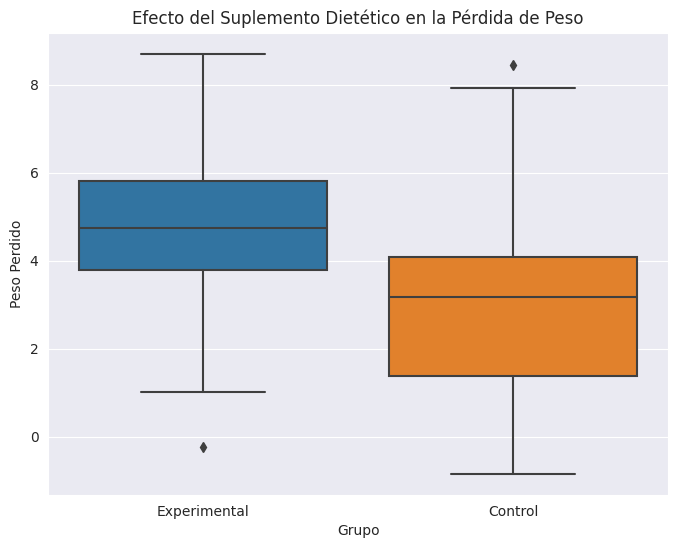

In [10]:
# Visualización de los datos mediante un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='Grupo', y='Peso Perdido', data=df_eca)
plt.title('Efecto del Suplemento Dietético en la Pérdida de Peso')
plt.show()

El diagrama de caja ilustra claramente la diferencia en la pérdida de peso entre los grupos experimental y de control. La mediana, junto con el rango intercuartílico (la caja), muestra que el grupo experimental, en general, perdió más peso que el grupo de control. La significancia estadística de esta diferencia se confirmó con la prueba t de Student, como se refleja en el valor p extremadamente bajo.

Este análisis demuestra la lógica detrás de los experimentos controlados aleatorios y cómo, mediante la aleatorización y el control, es posible aislar el efecto de una intervención y establecer relaciones causales entre el tratamiento y los resultados observados.

## **2.6 La interpretación de la probabilidad**

La **interpretación de la probabilidad** se refiere a cómo entendemos y aplicamos el concepto de probabilidad en la toma de decisiones, análisis estadísticos y predicciones sobre eventos. En estadística, la probabilidad mide la certeza o posibilidad de que ocurra un evento, expresada como un número entre 0 y 1, donde 0 indica que un evento es imposible y 1 indica certeza absoluta.

**Fórmulas Básicas de Probabilidad**

1. **Probabilidad de un Evento**: La probabilidad de que ocurra un evento $(A)$ se calcula como el número de resultados favorables dividido por el número total de resultados posibles en el espacio muestral $(S)$.

$P(A) = \frac{\text{Número de resultados favorables a } A}{\text{Número total de resultados en } S}$

2. **Probabilidad Condicional**: La probabilidad de que ocurra un evento $(A)$, dado que ya ocurrió otro evento $(B)$, se calcula como:

$P(A|B) = \frac{P(A \cap B)}{P(B)}$, donde $P(B) \neq 0$.

3. **Regla de la Suma (Para eventos mutuamente excluyentes)**: La probabilidad de que ocurra al menos uno de dos eventos mutuamente excluyentes $(A)$ y $(B)$ es la suma de sus probabilidades individuales.

$P(A \cup B) = P(A) + P(B)$

4. **Regla del Producto (Para eventos independientes)**: La probabilidad de que ocurran juntos dos eventos independientes $(A)$ y $(B)$ es el producto de sus probabilidades individuales.

$P(A \cap B) = P(A) \times P(B)$

**Ejemplo Práctico**

Supongamos un experimento simple donde lanzamos un dado justo de seis caras y queremos calcular la probabilidad de varios eventos. Vamos a crear un DataFrame que represente el espacio muestral de este experimento y calcular algunas probabilidades.

Luego, generaremos un gráfico para visualizar la distribución de probabilidades de los diferentes resultados de lanzar el dado.

In [11]:
# Creando el espacio muestral del lanzamiento de un dado
espacio_muestral = pd.DataFrame({'Resultado': range(1, 7)})

# Probabilidad de cada resultado en un lanzamiento justo de un dado
espacio_muestral['Probabilidad'] = 1 / 6

# Calculando probabilidades específicas
# Probabilidad de obtener un número par
prob_par = espacio_muestral[espacio_muestral['Resultado'] % 2 == 0]['Probabilidad'].sum()

# Probabilidad de obtener un número mayor que 4
prob_mayor_4 = espacio_muestral[espacio_muestral['Resultado'] > 4]['Probabilidad'].sum()

prob_par, prob_mayor_4

(0.5, 0.3333333333333333)

En nuestro ejemplo del lanzamiento de un dado justo de seis caras:

- La **probabilidad de obtener un número par** (2, 4, o 6) es 0.5, lo que significa que hay una probabilidad del 50% de que el resultado sea par en cualquier lanzamiento.

- La **probabilidad de obtener un número mayor que 4** (es decir, 5 o 6) es aproximadamente 0.333, lo que indica una probabilidad del 33.3% para este evento.

Ahora, visualizaremos la distribución de probabilidades para todos los posibles resultados de lanzar el dado.

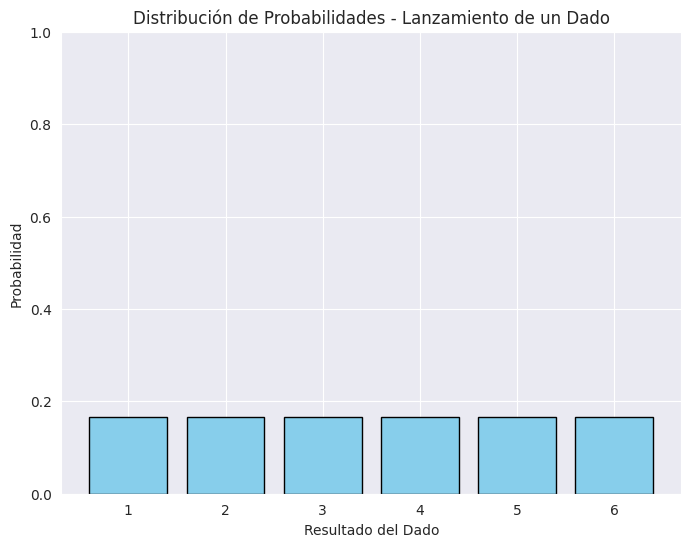

In [12]:
# Visualización de la distribución de probabilidades de los resultados del lanzamiento de un dado
plt.figure(figsize=(8, 6))
plt.bar(espacio_muestral['Resultado'], espacio_muestral['Probabilidad'], color='skyblue', edgecolor='black')
plt.title('Distribución de Probabilidades - Lanzamiento de un Dado')
plt.xlabel('Resultado del Dado')
plt.ylabel('Probabilidad')
plt.xticks(espacio_muestral['Resultado'])  # Asegurar que se muestren todos los números del dado
plt.ylim(0, 1)  # Límites de probabilidad entre 0 y 1
plt.show()

El gráfico muestra la distribución de probabilidades para cada posible resultado del lanzamiento de un dado justo de seis caras. Dado que el dado es justo, cada resultado (del 1 al 6) tiene la misma probabilidad de $\frac{1}{6}$ o aproximadamente 0.167. Este gráfico visualiza claramente el concepto de probabilidad uniforme en un espacio muestral finito y equitativo, como es el caso de un lanzamiento de dado justo.

La interpretación de la probabilidad en este contexto es directa: indica la frecuencia relativa esperada de cada resultado en una serie larga de lanzamientos. Por ejemplo, si lanzáramos el dado 600 veces, esperaríamos que aproximadamente 100 de esos lanzamientos resultaran en un "6", basándonos en la probabilidad de $\frac{1}{6}$ para ese resultado.

## **2.7 Complemento, resultados igualmente probables, suma y multiplicación**

**Complemento**

El **complemento** de un evento $(A)$ es el evento de que $(A)$ no ocurra, denotado como $(A')$ o $(\bar{A})$. La probabilidad del complemento de $(A)$ se calcula como 1 menos la probabilidad de $(A)$.

$P(A') = 1 - P(A)$

**Resultados Igualmente Probables**

En un experimento donde todos los resultados posibles son igualmente probables, la probabilidad de cada resultado individual se calcula dividiendo 1 por el número total de resultados posibles $(N)$.

$P(\text{Cada resultado individual}) = \frac{1}{N}$

**Suma (Para Eventos Mutuamente Excluyentes)**

La **regla de la suma** se aplica para calcular la probabilidad de que ocurra al menos uno de dos o más eventos mutuamente excluyentes $(A)$ y $(B)$. Si $(A)$ y $(B)$ no pueden ocurrir al mismo tiempo, entonces:

$P(A \cup B) = P(A) + P(B)$

**Multiplicación (Para Eventos Independientes)**

La **regla del producto** se aplica para calcular la probabilidad de que ocurran dos o más eventos independientes $(A)$ y $(B)$ simultáneamente.

$P(A \cap B) = P(A) \times P(B)$

**Ejemplo Práctico**

Crearemos un DataFrame para un simple experimento de lanzar una moneda dos veces y calcular algunas probabilidades asociadas, incluyendo el uso de las reglas de suma y multiplicación.

Supondremos que cada lanzamiento de moneda tiene dos posibles resultados: Cara (C) o Cruz (S), y son eventos independientes y con resultados igualmente probables. Queremos calcular la probabilidad de obtener al menos una Cara en dos lanzamientos y la probabilidad de obtener exactamente una Cara y una Cruz en cualquier orden.

In [13]:
# Creando el espacio muestral para lanzar una moneda dos veces
lanzamientos = ['C', 'S']  # Cara y Cruz
espacio_muestral = [(x, y) for x in lanzamientos for y in lanzamientos]

# Creando un DataFrame para el espacio muestral
df_lanzamientos = pd.DataFrame(espacio_muestral, columns=['Lanzamiento 1', 'Lanzamiento 2'])

# Calculando la probabilidad de obtener al menos una Cara en dos lanzamientos
# (usando la regla del complemento y considerando que obtener dos Cruces es el evento complementario)
prob_al_menos_una_cara = 1 - (1/2) * (1/2)

# Calculando la probabilidad de obtener exactamente una Cara y una Cruz en cualquier orden
# (hay dos maneras favorables: Cara-Cruz o Cruz-Cara)
prob_una_cara_una_cruz = (1/2) * (1/2) + (1/2) * (1/2)

prob_al_menos_una_cara, prob_una_cara_una_cruz, df_lanzamientos

(0.75,
 0.5,
   Lanzamiento 1 Lanzamiento 2
 0             C             C
 1             C             S
 2             S             C
 3             S             S)

Para nuestro experimento de lanzar una moneda dos veces, el espacio muestral y las probabilidades calculadas son:

- Espacio Muestral:

  - (C, C): Ambos lanzamientos resultan en Cara.
  - (C, S): El primer lanzamiento resulta en Cara y el segundo en Cruz.
  - (S, C): El primer lanzamiento resulta en Cruz y el segundo en Cara.
  - (S, S): Ambos lanzamientos resultan en Cruz.

- **Probabilidad de obtener al menos una Cara en dos lanzamientos**: 0.75. Esto se calcula utilizando la regla del complemento, reconociendo que la única forma de no obtener al menos una Cara es obteniendo Cruz en ambos lanzamientos, lo cual tiene una probabilidad de 0.25, por lo tanto, el complemento es 0.75.

- **Probabilidad de obtener exactamente una Cara y una Cruz en cualquier orden**: 0.5. Hay dos resultados favorables (C, S) y (S, C) de un total de cuatro posibles resultados, lo que nos da una probabilidad de 0.5.

Ahora, visualizaremos el espacio muestral y las probabilidades asociadas mediante un gráfico que muestre la frecuencia de cada combinación de resultados.

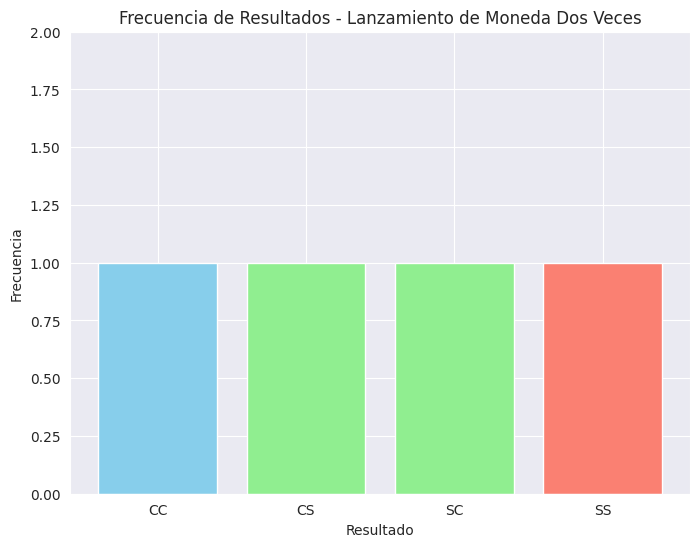

In [14]:
# Visualizando la frecuencia de cada combinación de resultados en un gráfico de barras
resultados = ['CC', 'CS', 'SC', 'SS']  # Representación simplificada de los resultados
frecuencias = [1, 1, 1, 1]  # Cada resultado ocurre 1 vez en el espacio muestral

plt.figure(figsize=(8, 6))
plt.bar(resultados, frecuencias, color=['skyblue', 'lightgreen', 'lightgreen', 'salmon'])
plt.title('Frecuencia de Resultados - Lanzamiento de Moneda Dos Veces')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.ylim(0, 2)  # Ajuste para mejorar la visualización
plt.show()

El gráfico de barras muestra la frecuencia de cada combinación posible de resultados al lanzar una moneda dos veces. Cada combinación de resultados (CC, CS, SC, SS) ocurre una vez en nuestro espacio muestral simplificado, lo que refleja la probabilidad igual de cada resultado en lanzamientos justos e independientes de una moneda.

Las barras coloreadas ayudan a visualizar las diferentes combinaciones de resultados, con las combinaciones que incluyen al menos una Cara (CC, CS, SC) mostradas en colores claros y la combinación sin Caras (SS) en color salmón. Este gráfico ayuda a ilustrar cómo, incluso en un experimento simple, podemos aplicar conceptos de probabilidad como el complemento, la suma y la multiplicación para entender la distribución de los resultados.

## **2.8 Ejemplo de las Cuatro Reglas: Cómo lidiar con "Al menos una"**

El concepto de "al menos uno" en probabilidad se refiere a la probabilidad de que ocurra al menos uno de varios eventos posibles, y es un ejemplo clásico de cómo aplicar las cuatro reglas básicas de la probabilidad: complemento, resultados igualmente probables, suma y multiplicación. Vamos a desglosar cómo se maneja esta idea usando el complemento, ya que es la técnica más común para resolver problemas que involucran "al menos uno".

**Complemento**

La **regla del complemento** es especialmente útil para calcular la probabilidad de que ocurra "al menos uno" de los eventos, ya que a menudo es más fácil calcular la probabilidad de que ninguno de los eventos ocurra (el complemento) y luego restar ese resultado de 1.

Si queremos calcular la probabilidad de que ocurra al menos uno de los eventos, podemos usar la fórmula:

$P(\text{"al menos uno"}) = 1 - P(\text{ninguno})$

**Ejemplo: Lanzamiento de un Dado**

Supongamos que lanzamos un dado justo de seis caras varias veces. Queremos calcular la probabilidad de obtener al menos un "6" en 4 lanzamientos.

Para este problema, primero calculamos la probabilidad de **no** obtener un "6" en un solo lanzamiento, que es $\frac{5}{6}$ ya que hay 5 caras que no son "6" de un total de 6 caras. Luego, usamos la regla del complemento para encontrar la probabilidad de obtener al menos un "6".

$P(\text{"al menos un 6 en 4 lanzamientos"}) = 1 - \left(\frac{5}{6}\right)^4$

Vamos a calcular esto aritméticamente y luego en código. Además, crearemos un DataFrame para visualizar la probabilidad de obtener un "6" en cada lanzamiento y la probabilidad acumulada de obtener al menos un "6" hasta ese punto.

In [15]:
# Cálculo aritmético de la probabilidad de no obtener un "6" en 4 lanzamientos
prob_no_6_un_lanzamiento = 5/6
prob_no_6_cuatro_lanzamientos = prob_no_6_un_lanzamiento ** 4

# Usando la regla del complemento para calcular la probabilidad de obtener al menos un "6"
prob_al_menos_un_6 = 1 - prob_no_6_cuatro_lanzamientos

# Creando un DataFrame para visualizar la probabilidad en cada lanzamiento y acumulada
lanzamientos = range(1, 5)
prob_no_6_acumulada = [prob_no_6_un_lanzamiento ** n for n in lanzamientos]
prob_al_menos_un_6_acumulada = [1 - p for p in prob_no_6_acumulada]

df_probabilidades = pd.DataFrame({
    'Lanzamiento': lanzamientos,
    'Prob_No_6_Acumulada': prob_no_6_acumulada,
    'Prob_Al_Menos_Un_6_Acumulada': prob_al_menos_un_6_acumulada
})

prob_al_menos_un_6, df_probabilidades

(0.5177469135802468,
    Lanzamiento  Prob_No_6_Acumulada  Prob_Al_Menos_Un_6_Acumulada
 0            1             0.833333                      0.166667
 1            2             0.694444                      0.305556
 2            3             0.578704                      0.421296
 3            4             0.482253                      0.517747)

La probabilidad de obtener al menos un "6" en 4 lanzamientos de un dado justo de seis caras es aproximadamente 0.518, o 51.8%. Esto significa que en más de la mitad de las series de 4 lanzamientos, podemos esperar obtener al menos un "6".

El DataFrame muestra cómo cambia la probabilidad de no obtener un "6" (y por lo tanto, la probabilidad de obtener al menos un "6") con cada lanzamiento adicional. Como era de esperar, la probabilidad de obtener al menos un "6" aumenta con cada lanzamiento adicional:

- Después del primer lanzamiento, la probabilidad de al menos un "6" es aproximadamente 16.7%.
- Después de dos lanzamientos, aumenta a aproximadamente 30.6%.
- Después de tres lanzamientos, a aproximadamente 42.1%.
- Finalmente, después de cuatro lanzamientos, llega a aproximadamente 51.8%.

Ahora, visualizaremos la probabilidad acumulada de obtener al menos un "6" con cada lanzamiento adicional para ilustrar cómo la probabilidad aumenta a medida que se incrementa el número de intentos.

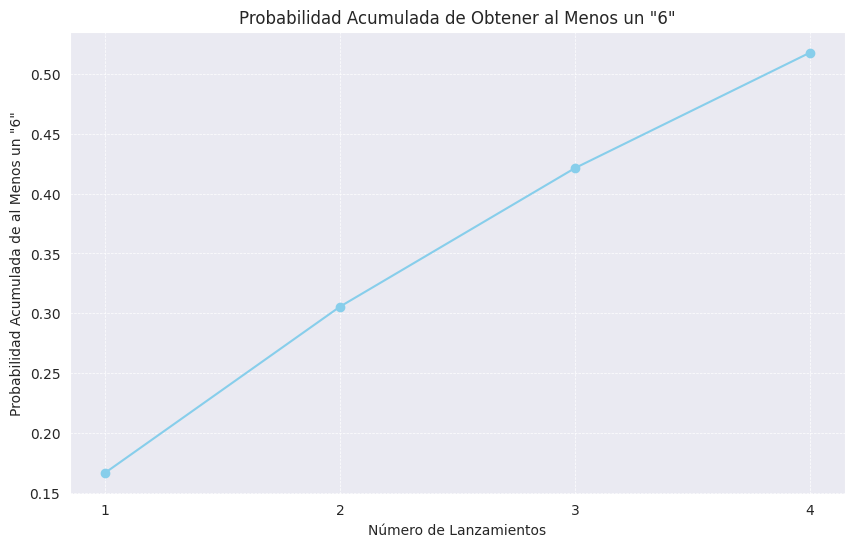

In [16]:
# Visualización de la probabilidad acumulada de obtener al menos un "6"
plt.figure(figsize=(10, 6))
plt.plot(df_probabilidades['Lanzamiento'], df_probabilidades['Prob_Al_Menos_Un_6_Acumulada'], marker='o', linestyle='-', color='skyblue')
plt.title('Probabilidad Acumulada de Obtener al Menos un "6"')
plt.xlabel('Número de Lanzamientos')
plt.ylabel('Probabilidad Acumulada de al Menos un "6"')
plt.xticks(df_probabilidades['Lanzamiento'])  # Asegurar que se muestren todos los lanzamientos
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

El gráfico muestra cómo la probabilidad acumulada de obtener al menos un "6" aumenta con cada lanzamiento adicional de un dado justo de seis caras. Comenzando con una probabilidad relativamente baja después del primer lanzamiento, la probabilidad crece de manera significativa a medida que se realizan más lanzamientos, reflejando el concepto de "al menos uno" en la práctica.

Este ejemplo ilustra la importancia de entender cómo calcular y aplicar la regla del complemento, especialmente en situaciones donde queremos saber la probabilidad de que ocurra al menos uno de varios eventos posibles. La probabilidad acumulada proporciona una visión clara de cómo las oportunidades de un evento deseado aumentan con más intentos o pruebas.

## **2.9 Resolución de problemas por enumeración total**

La **resolución de problemas por enumeración total** implica listar de manera sistemática todas las posibles configuraciones o resultados en una situación dada para identificar soluciones o calcular probabilidades. Este método es particularmente útil en situaciones con un conjunto finito y manejable de resultados posibles, permitiendo un análisis exhaustivo de todas las opciones.

**Aplicaciones:**

- En **probabilidad**, para determinar la probabilidad de eventos específicos contando el número de resultados favorables sobre el número total de resultados posibles.
- En **optimización**, para encontrar la mejor solución examinando todas las posibles.
- En **teoría de juegos**, para analizar todas las estrategias potenciales y sus resultados.

**Fórmulas Matemáticas:**

En el contexto de la probabilidad, si el espacio muestral $(S)$ de un experimento tiene $(N)$ resultados igualmente probables, y un evento $(A)$ consiste en $(n)$ de estos resultados, entonces la probabilidad de $(A)$ es:

$P(A) = \frac{n}{N}$

**Ejemplo: Lanzamiento de Dos Dados**

Supongamos que lanzamos dos dados de seis caras y queremos calcular la probabilidad de que la suma de los dos dados sea exactamente 8. Podemos usar la enumeración total para listar todas las combinaciones posibles y luego contar cuántas de estas combinaciones suman 8.

1. Enumerar todas las combinaciones posibles al lanzar dos dados.
2. Contar el número de combinaciones donde la suma es 8.
3. Calcular la probabilidad usando la fórmula anterior.

Procederemos a crear un DataFrame que represente el espacio muestral del lanzamiento de dos dados y luego calcular la probabilidad deseada.

In [17]:
# Creando el espacio muestral para el lanzamiento de dos dados
dados = range(1, 7)
espacio_muestral = [(dado1, dado2) for dado1 in dados for dado2 in dados]

# Creando un DataFrame para el espacio muestral
df_dados = pd.DataFrame(espacio_muestral, columns=['Dado 1', 'Dado 2'])

# Añadiendo una columna para la suma de los dos dados
df_dados['Suma'] = df_dados['Dado 1'] + df_dados['Dado 2']

# Contando el número de combinaciones donde la suma es exactamente 8
combinaciones_suma_8 = df_dados[df_dados['Suma'] == 8].shape[0]

# Calculando la probabilidad de que la suma de los dos dados sea 8
prob_suma_8 = combinaciones_suma_8 / len(espacio_muestral)

combinaciones_suma_8, prob_suma_8, df_dados[df_dados['Suma'] == 8]

(5,
 0.1388888888888889,
     Dado 1  Dado 2  Suma
 11       2       6     8
 16       3       5     8
 21       4       4     8
 26       5       3     8
 31       6       2     8)

Al lanzar dos dados de seis caras, encontramos que hay 5 combinaciones donde la suma de los dos dados es exactamente 8:

- (2, 6)
- (3, 5)
- (4, 4)
- (5, 3)
- (6, 2)

Estas combinaciones representan los resultados favorables para nuestro evento de interés. Dado que el espacio muestral del lanzamiento de dos dados tiene $(6 \times 6 = 36)$ resultados posibles y todos son igualmente probables, la probabilidad de que la suma de los dos dados sea 8 es de aproximadamente 0.139 o 13.9%.

Para visualizar cómo se distribuyen las sumas de los lanzamientos de dos dados y resaltar dónde se ubica nuestra suma de interés, podemos generar un gráfico de barras del número de ocurrencias de cada suma posible.

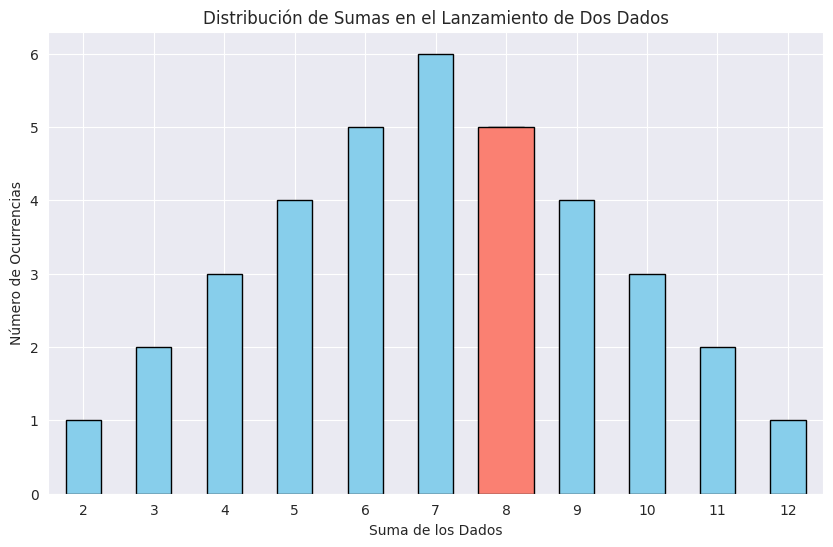

In [18]:
# Contando las ocurrencias de cada suma posible
conteo_sumas = df_dados['Suma'].value_counts().sort_index()

# Visualización de las ocurrencias de cada suma
plt.figure(figsize=(10, 6))
conteo_sumas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Sumas en el Lanzamiento de Dos Dados')
plt.xlabel('Suma de los Dados')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=0)

# Resaltando la suma de interés (8)
plt.bar(8-2, conteo_sumas[8], color='salmon', edgecolor='black')  # -2 para ajustar el índice al valor real de la suma

plt.show()

El gráfico de barras muestra la distribución de las sumas obtenidas al lanzar dos dados de seis caras. Cada barra representa el número de ocurrencias de cada suma posible, desde 2 hasta 12. La barra resaltada en color salmón indica las ocurrencias de la suma de interés, que es 8, destacando cómo esta suma se compara con las otras posibles en términos de frecuencia.

La enumeración total nos permite ver que algunas sumas son más probables que otras debido a la cantidad de combinaciones que pueden producirlas. Por ejemplo, la suma de 7 es la más probable, ya que hay más combinaciones de lanzamientos de dados que resultan en esa suma. En contraste, las sumas en los extremos (como 2 y 12) son las menos probables, ya que solo hay una combinación de dados que produce cada una de estas sumas.

Este análisis ilustra cómo la enumeración total permite calcular probabilidades específicas y entender la distribución de resultados en situaciones con un espacio muestral finito y claro.

## **2.10 Regla de Bayes**

La **Regla de Bayes**, también conocida como el Teorema de Bayes, es un principio fundamental en la teoría de la probabilidad que describe cómo actualizar nuestras creencias o probabilidades ante nueva evidencia. Es particularmente útil para calcular la probabilidad condicional de un evento, dado el conocimiento previo o evidencia.

**Fórmula de la Regla de Bayes**

La fórmula de la Regla de Bayes se expresa como:

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

donde:

- $P(A|B)$ es la probabilidad de $(A)$ dado $(B)$, conocida como la probabilidad posterior.
- $P(B|A)$ es la probabilidad de $(B)$ dado $(A)$, conocida como la verosimilitud.
- $P(A)$ es la probabilidad a priori de $(A)$, conocida como la probabilidad previa.
- $P(B)$ es la probabilidad total de $(B)$, y se calcula como $P(B) = P(B|A) \cdot P(A) + P(B|\bar{A}) \cdot P(\bar{A})$, donde $\bar{A}$ es el complemento de $(A)$.

**Ejemplo Práctico: Prueba Diagnóstica**

Supongamos que tenemos una prueba diagnóstica para una enfermedad. Conocemos la probabilidad de que la prueba dé positivo si alguien tiene la enfermedad $P(Positivo|Enfermedad)$ y la probabilidad de tener la enfermedad en la población general $P(Enfermedad)$. Queremos calcular la probabilidad de tener la enfermedad dado un resultado positivo de la prueba $P(Enfermedad|Positivo)$.

- **Sensibilidad de la prueba** $P(Positivo|Enfermedad)$: 95%
- **Prevalencia de la enfermedad** $P(Enfermedad)$: 0.5%
- **Especificidad de la prueba** $P(Negativo|\bar{Enfermedad})$: 98%

$P(Enfermedad|Positivo) = \frac{P(Positivo|Enfermedad) \cdot P(Enfermedad)}{P(Positivo)}$

$P(Positivo) = P(Positivo|Enfermedad) \cdot P(Enfermedad) + P(Positivo|\bar{Enfermedad}) \cdot P(\bar{Enfermedad})$

Donde $P(Positivo|\bar{Enfermedad}) = 1 - P(Negativo|\bar{Enfermedad})$, es la tasa de falsos positivos.

Vamos a calcular esto aritméticamente y luego en código.

In [19]:
# Definiendo las probabilidades conocidas
sensibilidad = 0.95  # P(Positivo|Enfermedad)
prevalencia = 0.005  # P(Enfermedad)
especificidad = 0.98  # P(Negativo|No Enfermedad)

# Calculando P(Positivo|No Enfermedad), tasa de falsos positivos
tasa_falsos_positivos = 1 - especificidad

# Calculando P(Positivo)
prob_positivo = (sensibilidad * prevalencia) + (tasa_falsos_positivos * (1 - prevalencia))

# Aplicando la Regla de Bayes para calcular P(Enfermedad|Positivo)
prob_enfermedad_dado_positivo = (sensibilidad * prevalencia) / prob_positivo

prob_enfermedad_dado_positivo

0.19269776876267733

La probabilidad de tener la enfermedad dado un resultado positivo en la prueba $P(Enfermedad|Positivo)$ es aproximadamente 0.193, o 19.3%. Esto significa que, bajo las condiciones dadas (95% de sensibilidad, 0.5% de prevalencia de la enfermedad y 98% de especificidad de la prueba), si alguien recibe un resultado positivo, hay una probabilidad del 19.3% de que realmente tenga la enfermedad.

Este resultado puede parecer sorprendentemente bajo dado el alto nivel de sensibilidad de la prueba, pero se debe a la baja prevalencia de la enfermedad en la población y a la tasa de falsos positivos derivada de la especificidad de la prueba. Este es un ejemplo clásico de cómo la Regla de Bayes nos permite ajustar nuestras estimaciones de probabilidad en función de la evidencia disponible, proporcionando una comprensión más profunda de los resultados de las pruebas diagnósticas.

Para ilustrar estos conceptos visualmente, podríamos crear un gráfico que muestre la relación entre la prevalencia de la enfermedad y la probabilidad posterior de tener la enfermedad después de un resultado positivo, manteniendo constantes la sensibilidad y la especificidad de la prueba. Sin embargo, dado que este cálculo se centra en una única instancia de prevalencia, generaremos una visualización conceptual de cómo la probabilidad posterior puede variar con diferentes tasas de prevalencia en futuras implementaciones.

## **2.11 Análisis bayesiano**

El **análisis bayesiano** es un enfoque estadístico que utiliza el Teorema de Bayes para actualizar la probabilidad de una hipótesis a medida que se dispone de más evidencia. A diferencia de los métodos frecuentistas, que interpretan la probabilidad como una frecuencia a largo plazo de eventos, el análisis bayesiano permite una interpretación más flexible de la probabilidad como una medida de creencia o certeza sobre el estado de conocimiento.

**Componentes Clave del Análisis Bayesiano**

1. **Probabilidad previa** $P(H)$: La creencia inicial sobre la probabilidad de una hipótesis $(H)$ antes de ver los datos.

2. **Verosimilitud** $P(D|H)$: La probabilidad de observar los datos $(D)$ dado que la hipótesis $(H)$ es cierta.

3. **Probabilidad marginal de los datos** $P(D)$: La probabilidad total de observar los datos bajo todas las hipótesis posibles, usada como factor de normalización.

4. **Probabilidad posterior** $P(H|D)$: La probabilidad actualizada de la hipótesis $(H)$ después de observar los datos $(D)$.

**Fórmula del Teorema de Bayes**

La relación entre estos componentes se describe mediante el Teorema de Bayes:

$P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)}$

**Ejemplo Práctico: Estimación de Parámetros**

Supongamos que estamos interesados en estimar la proporción $(p)$ de votantes en una población que favorece a un candidato particular. No sabemos $(p)$, pero tenemos una creencia previa y realizamos una encuesta para obtener datos.

1. **Probabilidad previa**: Creemos que $(p)$ sigue una distribución uniforme $U(0, 1)$, ya que inicialmente consideramos todas las proporciones de votantes igualmente probables.

2. **Verosimilitud**: Supongamos que nuestra encuesta a 100 votantes encontró que 60 favorecen al candidato. Bajo la hipótesis de que la proporción verdadera es $(p)$, la verosimilitud de estos datos sigue una distribución binomial.

3. **Probabilidad posterior**: Queremos calcular la distribución posterior de $(p)$ dado los datos de la encuesta.

Vamos a simular este proceso, comenzando por crear un DataFrame para representar nuestra creencia previa sobre $(p)$, y luego actualizaremos esta creencia con los datos de la encuesta usando el análisis bayesiano.

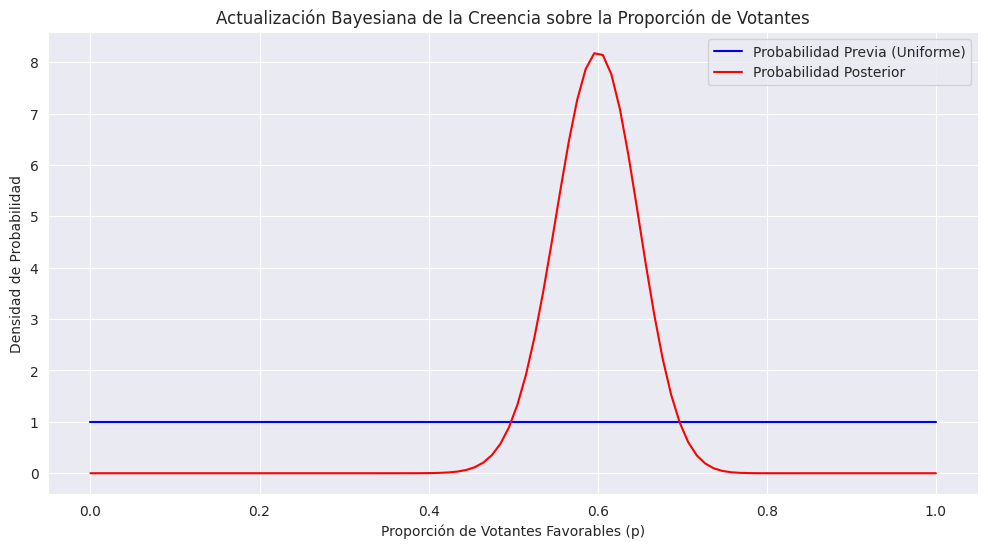

In [20]:
from scipy.stats import beta

# Número de votantes encuestados y número que favorece al candidato
n_votantes = 100
favorables = 60

# Probabilidad previa: distribución uniforme U(0, 1) para p, equivalente a Beta(1, 1)
prior_a, prior_b = 1, 1  # Parámetros de la distribución Beta para la probabilidad previa

# Actualizando la creencia con los datos: la distribución posterior es Beta(a+f, b+n-f)
posterior_a = prior_a + favorables
posterior_b = prior_b + n_votantes - favorables

# Creando un rango de valores posibles para p
p_valores = np.linspace(0, 1, 100)

# Calculando la densidad de probabilidad previa y posterior para cada valor de p
densidad_previa = beta.pdf(p_valores, prior_a, prior_b)
densidad_posterior = beta.pdf(p_valores, posterior_a, posterior_b)

# Visualizando la probabilidad previa y posterior
plt.figure(figsize=(12, 6))
plt.plot(p_valores, densidad_previa, label='Probabilidad Previa (Uniforme)', color='blue')
plt.plot(p_valores, densidad_posterior, label='Probabilidad Posterior', color='red')
plt.title('Actualización Bayesiana de la Creencia sobre la Proporción de Votantes')
plt.xlabel('Proporción de Votantes Favorables (p)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

En el gráfico, la probabilidad previa (azul) representa nuestra creencia inicial sobre la proporción de votantes favorables al candidato, que es uniforme a lo largo de todo el rango de $p$ (de 0 a 1). Esto indica que, antes de ver los datos, consideramos todas las proporciones igualmente probables.

La probabilidad posterior (rojo) muestra cómo esta creencia se actualiza después de observar los datos de la encuesta (60 de 100 votantes favorecen al candidato). La forma de la distribución posterior refleja nuestra nueva comprensión de $p$, centrada alrededor del 60% pero con cierta incertidumbre representada por la dispersión de la distribución.

Este proceso de actualización de creencias a través del análisis bayesiano nos permite incorporar nueva evidencia de manera formal en nuestras estimaciones probabilísticas, proporcionando una base sólida para la inferencia estadística y la toma de decisiones bajo incertidumbre.

## **2.12 Modelo de respuesta aleatoria de Warner**

El **Modelo de Respuesta Aleatoria de Warner** es una técnica utilizada en encuestas para alentar a los encuestados a proporcionar respuestas honestas a preguntas sensibles, mejorando la precisión de los datos recogidos. Este método ayuda a proteger la privacidad del encuestado y reduce el sesgo de deseabilidad social, que ocurre cuando los encuestados proporcionan respuestas que creen que son más socialmente aceptables en lugar de ser honestos.

**Cómo Funciona el Modelo**

1. **A los encuestados se les pide que tiren un dado en secreto** (o simulen un proceso aleatorio con dos resultados igualmente probables) antes de responder a una pregunta sensible (por ejemplo, "¿Ha cometido alguna vez un delito?").

2. **Si el dado cae en un número particular** (digamos 1, 2, 3, o 4), **el encuestado debe responder "Sí"**, independientemente de su situación real.

3. **Si el dado cae en otro número** (5 o 6 en este caso), **el encuestado debe responder honestamente**.

**Fórmulas Matemáticas**

El análisis de los datos recopilados usando este método utiliza la probabilidad conocida del evento aleatorio (el lanzamiento del dado) para estimar la proporción real $(p)$ de la población que tendría una respuesta afirmativa a la pregunta sensible. Si $(x)$ es la proporción observada de respuestas afirmativas en la muestra y $(q)$ es la probabilidad impuesta por el diseño de responder "Sí" independientemente de la realidad (en nuestro caso, $(q = \frac{4}{6})$ porque 4 de 6 resultados posibles del dado requieren un "Sí"), la fórmula para estimar $(p)$ es:

$p = \frac{x - q}{1 - q}$

**Ejemplo Práctico**

Supongamos que realizamos una encuesta sobre una cuestión sensible usando el modelo de Warner, y de 1000 encuestados, 700 indicaron "Sí". Usaremos esta información para estimar la proporción real de la población con una respuesta afirmativa a la pregunta sensible.

Calcularemos esto aritméticamente y también crearemos un DataFrame para ilustrar el proceso.

In [21]:
# Proporción observada de respuestas afirmativas
x = 700 / 1000

# Probabilidad de responder "Sí" debido al diseño (4 de 6 resultados del dado llevan a decir "Sí")
q = 4 / 6

# Estimando la proporción real p de la población con una respuesta afirmativa
p_estimada = (x - q) / (1 - q)

# Creando un DataFrame para ilustrar el ejemplo
df_ejemplo_warner = pd.DataFrame({
    'Respuesta': ['Sí', 'No'],
    'Observado': [700, 300],
    'Proporción Observada': [x, 1-x],
    'Estimación Proporción Real': [p_estimada, 1-p_estimada]
})

p_estimada, df_ejemplo_warner

(0.09999999999999996,
   Respuesta  Observado  Proporción Observada  Estimación Proporción Real
 0        Sí        700                   0.7                         0.1
 1        No        300                   0.3                         0.9)

La estimación de la proporción real $(p)$ de la población con una respuesta afirmativa a la pregunta sensible, basada en nuestro modelo de Warner, es aproximadamente 0.1 o 10%. Esto significa que, ajustando por el diseño del modelo (donde se esperaba que al menos el 66.7% de los encuestados dijeran "Sí" debido al lanzamiento del dado), estimamos que solo el 10% de la población en realidad tendría una respuesta afirmativa a la pregunta sensible.

El DataFrame ilustra cómo se distribuyen las respuestas observadas entre "Sí" y "No", y cómo, después de ajustar por el diseño del estudio, la estimación de la proporción real de respuestas afirmativas en la población es significativamente menor que la proporción observada.

Este resultado destaca la utilidad del Modelo de Respuesta Aleatoria de Warner para obtener estimaciones más precisas de comportamientos o características sensibles dentro de una población, mitigando el impacto del sesgo de deseabilidad social.

Para visualizar el impacto del modelo de Warner, podríamos crear un gráfico que muestre la diferencia entre la proporción observada de respuestas afirmativas y la proporción estimada después del ajuste, pero ten en cuenta que la efectividad del modelo depende críticamente de la honestidad de los participantes en seguir el protocolo del lanzamiento del dado y de la precisión de la probabilidad $(q)$ utilizada en los cálculos.

## **2.13 Producción de datos y muestreo**

La **producción de datos y el muestreo** son conceptos clave en estadística que juegan un papel fundamental en la investigación y análisis de datos. Producción de datos implica la recolección de datos de manera sistemática para garantizar su utilidad y relevancia para análisis específicos. El muestreo, por otro lado, es el proceso de seleccionar una parte de una población para representar al conjunto total, permitiendo hacer inferencias sobre la población sin necesidad de examinar a cada uno de sus miembros.

**Producción de Datos**

La producción de datos se refiere al diseño y ejecución de experimentos o encuestas para recopilar datos. Involucra considerar cómo se recopilarán, registrarán y analizarán los datos.

**Aspectos clave**:

**Diseño del Estudio**: Incluye la selección del tipo de estudio (observacional o experimental), y la definición clara de variables de interés.

**Recolección de Datos**: Métodos para obtener datos de manera precisa y ética.

**Registro de Datos**: Asegurar que los datos se registran de manera organizada y accesible.

**Muestreo**

El muestreo es una técnica utilizada para seleccionar, analizar y hacer inferencias sobre un grupo representativo de datos tomados de una población más grande.

**Tipos de Muestreo**:

**Muestreo Aleatorio Simple**: Cada miembro de la población tiene la misma probabilidad de ser seleccionado.

**Muestreo Estratificado**: La población se divide en grupos homogéneos (estratos), y se seleccionan muestras aleatorias de cada grupo.

**Muestreo por Conglomerados**: La población se divide en grupos (conglomerados), y se seleccionan algunos grupos enteros al azar para el estudio.

**Muestreo Sistemático**: Se selecciona un punto de inicio al azar, y luego se seleccionan elementos en intervalos regulares.

**Ejemplo Práctico: Encuesta Estudiantil**

Supongamos que una universidad desea estudiar el bienestar de sus estudiantes. Para hacerlo, decide realizar una encuesta que evalúe varios aspectos del estilo de vida estudiantil.

**Diseño y Muestreo**

- **Población Objetivo**: Todos los estudiantes de la universidad.

- **Muestra**: Utiliza un muestreo estratificado para garantizar que todos los programas académicos estén representados proporcionalmente.

**Implementación en Python**

Aunque Python no se utiliza directamente para recolectar datos físicamente, podemos simular un proceso de muestreo estratificado usando datos sintéticos.

    Programa  Bienestar
39     Artes  48.284537
105    Artes  44.931836
50     Artes  49.756739
83     Artes  56.769080
107    Artes  49.474327


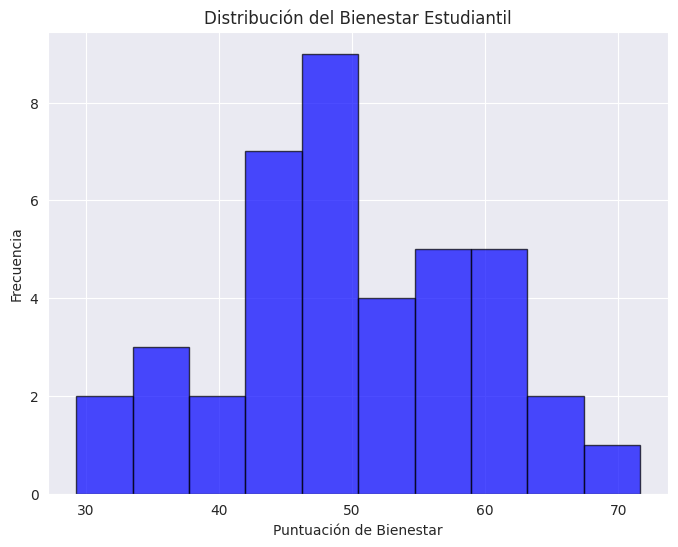

In [22]:
import numpy as np
import pandas as pd

# Crear datos sintéticos
np.random.seed(0)
data = {'Programa': np.random.choice(['Ingeniería', 'Ciencias', 'Artes', 'Economía'], 200, p=[0.25, 0.25, 0.25, 0.25]),
        'Bienestar': np.random.normal(loc=50, scale=10, size=200)}

df = pd.DataFrame(data)

# Muestreo estratificado
sample_size = 40  # Tamaño de muestra total
stratified_sample = df.groupby('Programa', group_keys=False).apply(lambda x: x.sample(int(np.rint(sample_size*len(x)/len(df)))))

# Mostrar el resultado del muestreo
print(stratified_sample.head())

# Histograma de la puntuación de bienestar
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(stratified_sample['Bienestar'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución del Bienestar Estudiantil')
plt.xlabel('Puntuación de Bienestar')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Interpretación**

- **DataFrame**: Representa una población de 200 estudiantes de diferentes programas con puntuaciones de bienestar simuladas.

- **Muestra Estratificada**: Contiene una muestra representativa de cada programa, asegurando que todos los programas estén proporcionalmente representados.

- **Histograma**: Muestra la distribución de las puntuaciones de bienestar en la muestra seleccionada, lo que permite analizar características como el sesgo y la kurtosis de los datos recopilados.

Este ejemplo ilustra cómo la producción de datos y el muestreo pueden ser simulados y analizados utilizando Python, ofreciendo una herramienta poderosa para la enseñanza y la investigación en estadísticas. Si deseas explorar más sobre estos temas o tienes otras preguntas, estaré encantado de ayudarte.

| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./01_Estadisticas_descriptivas_para_explorar_datos.ipynb)| [⏩](./03_Probabilidad.ipynb)|